In [2]:
import torch
from torch import  nn
from d2l import  torch as d2l
def dropout_layer(X,dropout):
    assert 0<=dropout<=1,'dropout error'
    if dropout == 1:
        return torch.zeros_like(X)
    if dropout == 0:
        return X
    # 乘法 GPU计算比较快
    mask = (torch.rand(X.shape)>dropout).float()
    return mask * X / (1.-dropout)


In [7]:
x = torch.arange(16,dtype=torch.float32).reshape((2,8))
print(x)
print(dropout_layer(x,0.))
print(dropout_layer(x,0.5))
print(dropout_layer(x,1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  4.,  0.,  0.,  0., 12.,  0.],
        [16., 18., 20., 22., 24., 26., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


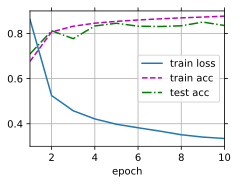

In [3]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1, dropout2 = 0.2, 0.5
class Net(nn.Module):
    def __init__(self,num_inputs,num_outputs,num_hiddens1,num_hiddens2,
                 is_training=True):
        super(Net,self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs,num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1,num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2,num_outputs)
        self.relu = nn.ReLU()
    def forward(self,X):
        H1 = self.relu(self.lin1(X.reshape((-1,self.num_inputs))))
        if self.training==True:
            H1 = dropout_layer(H1,dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training==True:
            H2 = dropout_layer(H2,dropout2)
        out = self.lin3(H2)
        return out
net = Net(num_inputs,num_outputs,num_hiddens1,num_hiddens2)
num_epochs, lr, batch_size = 10,0.5,256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

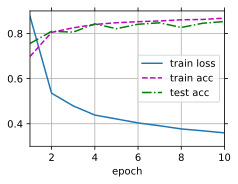

In [4]:
# 简洁实现
net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),
                    nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),
                    nn.Dropout(dropout2),nn.Linear(256,10))
def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.1)
net.apply(init_weights)
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)